In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Importing data (just original for now)

In [19]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [20]:
data = pd.read_csv("../../Data/MIGHTEE/Classification/final_gaussian_radio_more.csv")

In [21]:
# Dropping nan classifications
data = data[data['Classification'].notna()]

# Dropping quasar-like radio AGN / high-excitation radio galaxy
#mightee_data = mightee_data[mightee_data['Classification'] != 'star-forming galaxy']
print("Amount of rows:", len(data))

Amount of rows: 4370


In [22]:
X = data.drop(columns=['Classification', 'XAGN', 'midIRAGN', 'VLBAAGN', 'RLAGN', 'optAGN', 'Unnamed: 0', 'S_INT14', 'S_PEAK14'])
y = data[['Classification', 'XAGN', 'midIRAGN', 'VLBAAGN', 'RLAGN', 'optAGN']]

# Dropping columns with little data (optional)

In [23]:
X = X.drop(columns=['F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'NUV_flux_corr', 'FUV_flux_corr'])

## Filling nan's

In [24]:
imp = IterativeImputer(max_iter=100, min_value=0)
X_filled = imp.fit_transform(X)

## Normalisations

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X_filled = scaler.fit_transform(X_filled)

## Kmeans

In [26]:
n = 8
kmeans = KMeans(n_clusters=n, random_state=0)
kmeans.fit(X_filled)

KMeans(random_state=0)

In [27]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1835,   20,  122, 1755,  591,    9,   25,   13]))

In [28]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_filled)
    kmeanModel.fit(X_filled)
  
    distortions.append(sum(np.min(cdist(X_filled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_filled.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_filled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_filled.shape[0]
    mapping2[k] = kmeanModel.inertia_

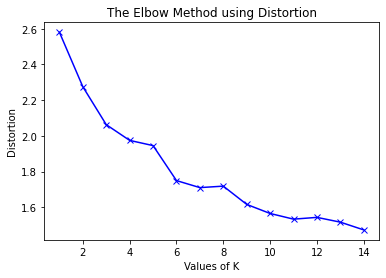

In [29]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [30]:
data['KMeans'] = kmeans.labels_
data.to_csv('Kmeans.csv', index=False)

# Spectral clustering

In [31]:
from sklearn.cluster import SpectralClustering

In [ ]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 10)
  
for k in K:
    print(k)
    # Building and fitting the model
    clustering = SpectralClustering(n_clusters=k, n_jobs=8).fit(X_filled)
    clustering.fit(X_filled)
  
    distortions.append(sum(np.min(cdist(X_filled, clustering.cluster_centers_,
                                        'euclidean'), axis=1)) / X_filled.shape[0])
    inertias.append(clustering.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_filled, clustering.cluster_centers_,
                                   'euclidean'), axis=1)) / X_filled.shape[0]
    mapping2[k] = clustering.inertia_

2


/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
clustering = SpectralClustering(n_clusters=6, n_jobs=1, verbose=True, assign_labels="discretize").fit(X_filled)
clustering.fit(X_filled)

In [ ]:
classes = clustering.labels_
for i in range(len(np.unique(classes))):
    print(i, ":")
    print(y['Classification'].iloc[classes==i].value_counts()/y['Classification'].value_counts())
    print()

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

 # GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(X_filled)

In [24]:
from scipy.spatial.distance import cdist

bic_means = []
bic_stds = []
K = range(1, 10)

for k in K:
    print(k)
    trial = []
    for i in range(8):
        
        # Building and fitting the model
        gm = GaussianMixture(n_components=k).fit(X_filled)
        gm.fit(X_filled)

        trial.append(gm.bic(X_filled))
    bic_means.append(np.mean(trial))
    bic_stds.append(np.std(trial))

1
2
3
4
5
6
7
8
9


/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/users/karsten/.local/lib/python3.9/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


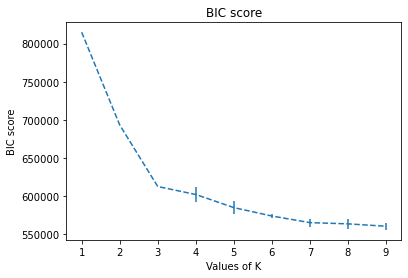

In [25]:
plt.errorbar(x=K, y=bic_means, yerr=bic_stds, ls='--')
plt.xlabel('Values of K')
plt.ylabel('BIC score')
plt.title('BIC score')
plt.show()

In [ ]:
n=3
gm = GaussianMixture(n_components=n, random_state=0)
gm.fit(X_filled)

classes = gm.predict(X_filled)
for i in range(n):
    print(i, ":")
    print(y['Classification'].iloc[classes==i].value_counts())
    print()

In [28]:
n=4
gm = GaussianMixture(n_components=n, random_state=0)
gm.fit(X_filled)

classes = gm.predict(X_filled)
for i in range(n):
    print(i, ":")
    print(y['Classification'].iloc[classes==i].value_counts()/y['Classification'].value_counts())
    print()

0 :
star-forming galaxy                                     0.435842
jet-mode radio AGN/low-excitation radio galaxy          0.594156
radio-quiet AGN                                         0.439024
quasar-like radio AGN / high-excitation radio galaxy    0.593496
Name: Classification, dtype: float64

1 :
jet-mode radio AGN/low-excitation radio galaxy          0.060606
quasar-like radio AGN / high-excitation radio galaxy    0.117886
radio-quiet AGN                                         0.221951
star-forming galaxy                                     0.085663
Name: Classification, dtype: float64

2 :
jet-mode radio AGN/low-excitation radio galaxy          0.005411
quasar-like radio AGN / high-excitation radio galaxy    0.004065
radio-quiet AGN                                         0.019512
star-forming galaxy                                     0.032975
Name: Classification, dtype: float64

3 :
star-forming galaxy                                     0.445520
jet-mode radio AGN/low-ex